In [1]:
import numpy as np
import pandas as pd
from rdmulti import rdmc, rdms, rdmcplot
import os

In [2]:
if not os.path.exists('rdmulti_results'):
    os.makedirs('rdmulti_results')

In [3]:
data = pd.read_csv('simdata_multic.csv')
Y = data.y
X = data.x
C = data.c
data

,c,x,t,y
0,33,0.018473,0,790.404896
1,33,0.136310,0,540.084857
2,66,0.149883,0,1438.682082
3,66,0.160812,0,1412.837170
4,66,0.193807,0,1545.286853
...,...,...,...,...
1995,33,99.794470,1,1508.127779
1996,66,99.807708,1,2780.420451
1997,66,99.946217,1,2984.696788
1998,66,99.956101,1,2946.313877


# Multiple cutoffs

In [5]:
aux = rdmc(Y,X,C,output_path='rdmulti_results/Cutoff-specific RD estimation with robust bias-corrected inference.txt')


Cutoff-specific RD estimation with robust bias-corrected inference
Cutoff      Coef.    P-value          95% CI           hl        hr        Nh    Weight
33.000      484.831   0.000     421.184    552.531    14.662    14.662     289     0.540
66.000      297.981   0.000     220.348    362.268    11.952    11.952     246     0.460
Weighted    398.915   0.000     348.742    445.141      .         .        535       .  
Pooled      436.400   0.001     179.336    676.631    13.684    13.684     550       .  



Cutoff-specific RD estimation with robust bias-corrected inference
Cutoff      Coef.    P-value          95% CI           hl        hr        Nh    Weight
33.000      484.831   0.000     421.184    552.531    14.662    14.662     289     0.540
66.000      297.981   0.000     220.348    362.268    11.952    11.952     246     0.460
Weighted    398.915   0.000     348.742    445.141      .         .        535       .  
Pooled      436.400   0.001     179.336    676.631    13.684    13.684     550       .  


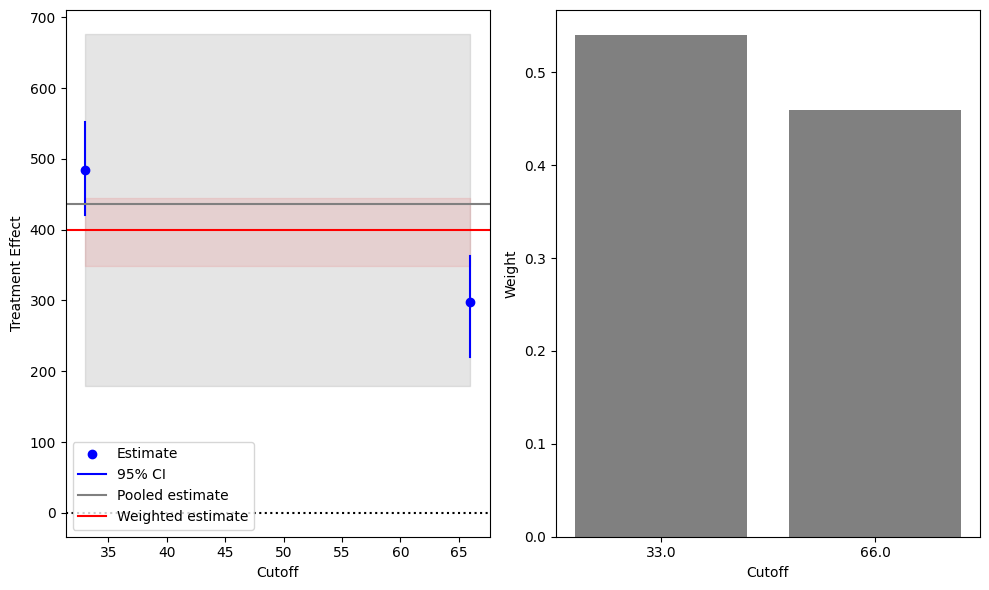

In [4]:
aux = rdmc(Y,X,C, plot = True, plot_path='rdmulti_results/Cutoff-specific RD estimation with robust bias-corrected inference.png',figsize=(10,6),dpi=600)

In [11]:
aux = rdmc(Y, X, C, pooled_opt='h=20,p=2', verbose=True)

Call: rdrobust
Number of Observations:                  2000
Polynomial Order Est. (p):                  2
Polynomial Order Bias (q):                  3
Kernel:                            Triangular
Bandwidth Selection:                   Manual
Var-Cov Estimator:                         NN

                                Left      Right
------------------------------------------------
Number of Observations           968       1032
Number of Unique Obs.            968       1032
Number of Effective Obs.         409        416
Bandwidth Estimation              20         20
Bandwidth Bias                    20         20
rho (h/b)                        1.0        1.0

Method             Coef.     S.E.   t-stat    P>|t|       95% CI      
-------------------------------------------------------------------------
Conventional     437.042  129.798    3.367   7.596e-04 [182.643, 691.441]
Robust                 -        -    3.012   2.597e-03 [185.618, 877.381]


Cutoff-specific RD estimati

In [12]:
aux = rdmc(Y, X, C, hmat=[11, 10])


Cutoff-specific RD estimation with robust bias-corrected inference
Cutoff      Coef.    P-value          95% CI           hl        hr        Nh    Weight
33.000      495.429   0.000     368.129    563.215    11.000    11.000     207     0.498
66.000      303.769   0.000     220.396    403.320    10.000    10.000     209     0.502
Weighted    399.138   0.000     321.557    455.233      .         .        416       .  
Pooled      436.400   0.001     179.336    676.631    13.684    13.684     550       .  


In [13]:
aux = rdmc(Y, X, C, bwselectvec=['msetwo', 'certwo'])


Cutoff-specific RD estimation with robust bias-corrected inference
Cutoff      Coef.    P-value          95% CI           hl        hr        Nh    Weight
33.000      481.567   0.000     417.801    546.828    14.485    16.912     313     0.570
66.000      298.726   0.000     227.420    367.214    14.739    7.952      236     0.430
Weighted    402.969   0.000     355.295    450.283      .         .        549       .  
Pooled      436.400   0.001     179.336    676.631    13.684    13.684     550       .  


In [7]:
# Add four covariates
Z = np.random.randn(len(Y), 4)
Z

array([[-0.97161191,  1.17684466, -1.32863734, -0.24439516],
       [ 0.3197676 ,  0.24121188, -1.41152013,  1.84580735],
       [ 0.22178296, -0.73234471, -0.65686558,  1.28912759],
       ...,
       [-0.70067186, -0.55969447,  1.75991205,  0.80357649],
       [ 0.21746455,  0.80001795, -0.25216247,  0.55558872],
       [ 0.26633451, -0.19409947,  0.33402768, -0.01991208]])

In [8]:
# Including all covariates in each cutoff
aux = rdmc(Y, X, C, covs_mat=Z)


Cutoff-specific RD estimation with robust bias-corrected inference
Cutoff      Coef.    P-value          95% CI           hl        hr        Nh    Weight
33.000      482.613   0.000     420.873    547.386    15.051    15.051     299     0.552
66.000      297.455   0.000     218.903    363.109    11.861    11.861     243     0.448
Weighted    399.599   0.000     349.976    445.113      .         .        542       .  
Pooled      436.400   0.001     179.336    676.631    13.684    13.684     550       .  


In [16]:
# Use covariates Z1 and Z2 in cutoff 1, all four covariates in cutoff 2
covlist = [[0, 1], list(range(4))] #covariates at cutoff 1: [0,1], 即Z的前两列 , covariates at cutoff 2: [0,1,2,3]
aux = rdmc(Y, X, C, covs_mat=Z, covs_list=covlist)


Cutoff-specific RD estimation with robust bias-corrected inference
Cutoff      Coef.    P-value          95% CI           hl        hr        Nh    Weight
33.000      485.419   0.000     422.146    552.866    14.865    14.865     294     0.535
66.000      301.580   0.000     228.555    363.840    12.626    12.626     256     0.465
Weighted    399.850   0.000     351.429    445.492      .         .        550       .  
Pooled      436.400   0.001     179.336    676.631    13.684    13.684     550       .  


In [17]:
# Add weights
wvar = np.random.uniform(0.8, 1.2, len(Y)*len(np.unique(C))).reshape(len(Y),-1)
aux = rdmc(Y, X, C, weightsvec=wvar)


Cutoff-specific RD estimation with robust bias-corrected inference
Cutoff      Coef.    P-value          95% CI           hl        hr        Nh    Weight
33.000      489.033   0.000     425.408    557.340    14.507    14.507     284     0.547
66.000      296.715   0.000     216.719    363.975    11.522    11.522     235     0.453
Weighted    401.953   0.000     351.213    449.487      .         .        519       .  
Pooled      436.400   0.001     179.336    676.631    13.684    13.684     550       .  


## Multi-cutoff Plot

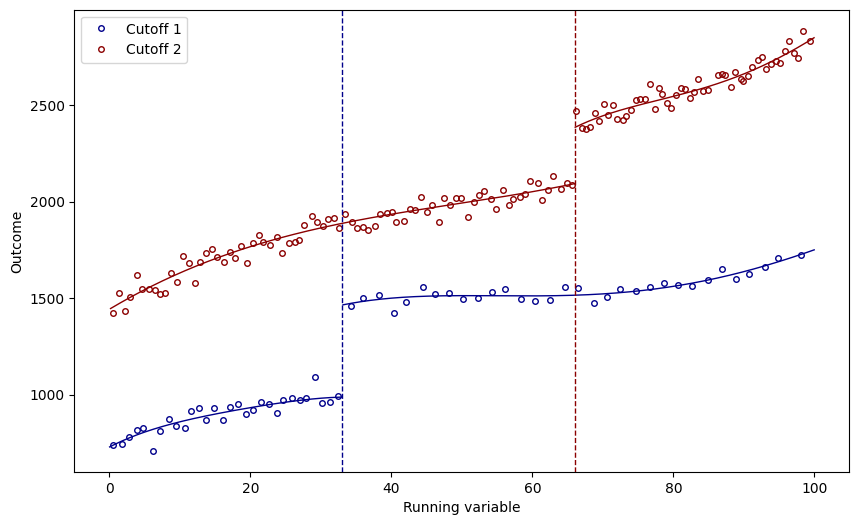

In [5]:
aux = rdmcplot(Y, X, C, save_path='rdmulti_results/multi-cutoff plot.png',figsize=(10,6),dpi=600)

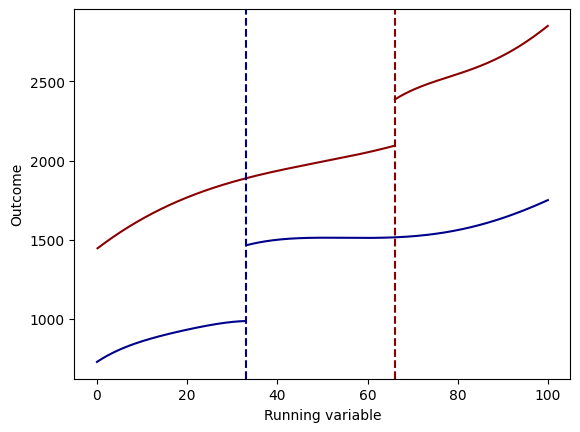

In [19]:
aux = rdmcplot(Y, X, C, nobins=True)

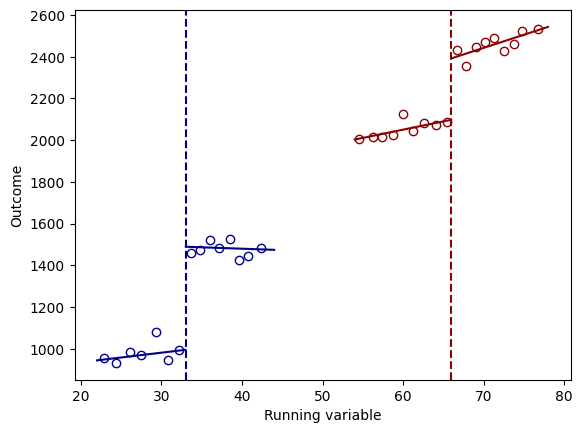

In [20]:
aux = rdmcplot(Y, X, C, hmat=[11, 12], pvec=[1, 1])

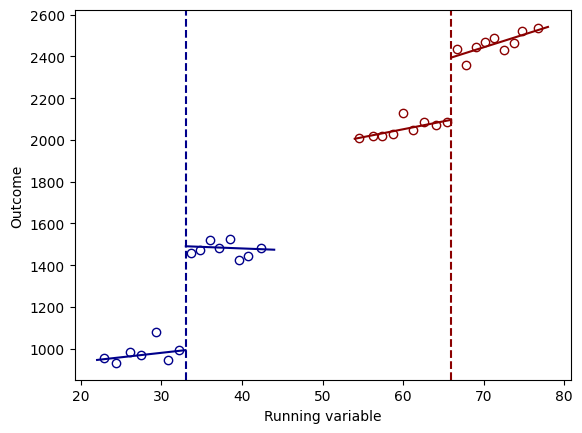

In [25]:
aux = rdmcplot(Y, X, C,hmat=[11, 12], pvec=[1,1], covs_mat=Z, covs_list=covlist)

# Cumulative cutoffs

In [6]:
data = pd.read_csv('simdata_cumul.csv')
Y = data['y']
X = data['x']
cvec = np.array([data['c'][0], data['c'][1]])
data

,x,y,c
0,0.041317,741.892494,33.0
1,0.333542,831.522188,66.0
2,0.450371,726.067965,NaN
3,0.478511,833.468127,NaN
4,0.553756,658.419758,NaN
...,...,...,...
995,99.596575,2338.165796,NaN
996,99.642359,2418.150978,NaN
997,99.772471,2369.300624,NaN
998,99.869248,2291.527913,NaN


In [7]:
aux = rdms(Y, X, cvec)


Cutoff           Coef.    P-value          95% CI           hl        hr        Nh   
33.00            395.492   0.000     363.761    423.856    15.109    15.109     286    
66.00            342.872   0.000     315.952    373.959    12.221    12.221     265    


In [8]:
aux = rdms(Y, X, cvec, hmat=(11, 8), kernelvec=('uniform', 'triangular'))


Cutoff           Coef.    P-value          95% CI           hl        hr        Nh   
33.00            394.470   0.000     351.649    438.725    11.000    11.000     215    
66.00            342.505   0.000     301.556    375.947    8.000     8.000      166    


In [9]:
rangemat = np.array([[0, 35.0], [60.5, 100]])
aux = rdms(Y, X, cvec, rangemat=rangemat)


Cutoff           Coef.    P-value          95% CI           hl        hr        Nh   
33.00            433.326   0.000     333.400    587.689    3.998     3.998       58    
66.00            330.277   0.000     278.398    364.647    3.442     3.442       70    


In [11]:
cutoff = cvec[0] * (X <= 49.5) + cvec[1] * (X > 49.5) # 49.5 = (33+66)/2
aux = rdmc(Y, X, cutoff)


Cutoff-specific RD estimation with robust bias-corrected inference
Cutoff      Coef.    P-value          95% CI           hl        hr        Nh    Weight
33.000      389.528   0.000     332.937    443.686    6.261     6.261      119     0.531
66.000      341.015   0.000     300.389    377.332    5.042     5.042      105     0.469
Weighted    366.788   0.000     330.626    399.637      .         .        224       .  
Pooled      363.968   0.000     180.111    551.784    8.137     8.137      333       .  


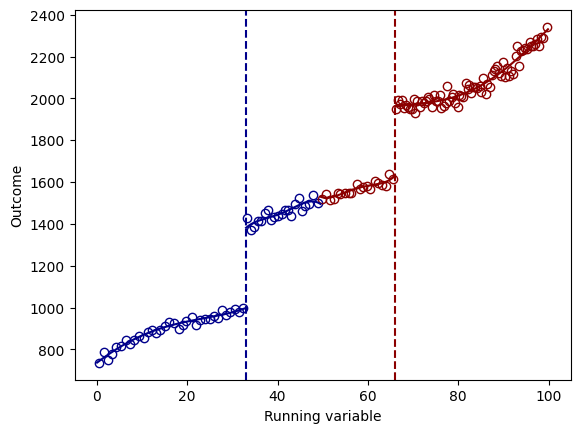

In [34]:
aux = rdmcplot(Y, X, cutoff)

In [35]:
# Add four covariates
Z = np.random.randn(len(Y), 4)
Z

array([[-0.69242858, -0.37018015,  1.51565915, -0.73586252],
       [ 1.67231634,  0.41724499, -0.3175291 , -0.70472659],
       [ 0.74342699, -0.40790367,  1.01010125,  0.35574362],
       ...,
       [-1.4783533 , -1.0480948 ,  1.53280554,  0.2047506 ],
       [ 0.35685271, -1.40775117, -0.88870946,  1.31772931],
       [-0.91558175,  0.44814546, -0.48910731, -0.7381162 ]])

In [36]:
# Including all covariates in each cutoff
aux = rdms(Y, X, cvec, covs_mat=Z)


Cutoff           Coef.    P-value          95% CI           hl        hr        Nh   
33.00            395.090   0.000     360.234    429.517    10.880    10.880     212    
66.00            337.892   0.000     306.130    366.390    11.305    11.305     247    


In [37]:
# Use covariates Z1 and Z2 in cutoff 1, all four covariates in cutoff 2
covlist = [[0, 1], list(range(4))]
aux = rdms(Y, X, cvec, covs_mat=Z, covs_list=covlist)


Cutoff           Coef.    P-value          95% CI           hl        hr        Nh   
33.00            393.317   0.000     354.627    430.520    9.450     9.450      183    
66.00            337.892   0.000     306.130    366.390    11.305    11.305     247    


# Bivariate score

In [12]:
data = pd.read_csv('simdata_multis.csv')
Y = data['y']
X1 = data['x1']
X2 = data['x2']
zvar = data['t']
cvec = [data['c1'][0], data['c1'][1], data['c1'][2]]
cvec2 = [data['c2'][0], data['c2'][1], data['c2'][2]]
data

,x1,x2,t,y,c1,c2
0,0.632367,90.287053,0,511.94617,25.0,50.0
1,0.799380,70.407448,0,510.12607,50.0,50.0
2,0.925390,27.371973,1,1084.21300,50.0,25.0
3,0.971015,56.326445,0,689.85651,NaN,NaN
4,1.003361,27.058111,1,911.08063,NaN,NaN
...,...,...,...,...,...,...
995,99.621050,54.724745,0,777.84259,NaN,NaN
996,99.761712,1.254829,0,618.49078,NaN,NaN
997,99.809352,27.320952,0,623.26678,NaN,NaN
998,99.893212,32.317777,0,563.73029,NaN,NaN


In [13]:
aux = rdms(Y, X1, cvec, X2, zvar, cvec2)


Cutoff           Coef.    P-value          95% CI           hl        hr        Nh   
(25.0 , 50.0)   243.831   0.111     -50.961    491.196    11.123    11.123      42    
(50.0 , 50.0)   578.673   0.000     410.780    764.816    13.835    13.835      47    
(50.0 , 25.0)   722.127   0.000     451.395    1059.515   10.845    10.845      38    


In [14]:
aux = rdms(Y, X1, cvec, X2, zvar, cvec2, hmat=[15, 13, 17])


Cutoff           Coef.    P-value          95% CI           hl        hr        Nh   
(25.0 , 50.0)   336.121   0.233     -119.352   491.365    15.000    15.000      87    
(50.0 , 50.0)   583.047   0.000     501.940    1101.236   13.000    13.000      42    
(50.0 , 25.0)   620.692   0.000     464.920    1159.992   17.000    17.000      86    


In [41]:
xnorm = np.min(np.column_stack((np.abs(50 - X1), np.abs(50 - X2))), axis=1) * (2 * zvar - 1)
aux = rdms(Y, X1, cvec, X2, zvar, cvec2, xnorm=xnorm)


Cutoff           Coef.    P-value          95% CI           hl        hr        Nh   
(25.0 , 50.0)   243.831   0.111     -50.961    491.196    11.123    11.123      42    
(50.0 , 50.0)   578.673   0.000     410.780    764.816    13.835    13.835      47    
(50.0 , 25.0)   722.127   0.000     451.395    1059.515   10.845    10.845      38    
-------------------------------------------------------------------------------------
Pooled          447.013   0.000     389.321    496.854    12.723    12.723     433    


In [42]:
# Add four covariates
Z = np.random.randn(len(Y), 4)

In [43]:
# Including all covariates in each cutoff
aux = rdms(Y, X1, cvec, X2, zvar, cvec2, covs_mat=Z)


Cutoff           Coef.    P-value          95% CI           hl        hr        Nh   
(25.0 , 50.0)   235.568   0.127     -59.352    475.716    11.471    11.471      44    
(50.0 , 50.0)   717.087   0.000     633.310    853.523    10.724    10.724      26    
(50.0 , 25.0)   682.088   0.000     587.589    854.343    9.777     9.777       30    


In [44]:
# Use covariates Z1 and Z2 in cutoff 1, all four covariates in cutoff 2, covariates Z1 and Z3 in cutoff 3
covlist = [[0, 1], list(range(4)), [0, 2]]
aux = rdms(Y, X1, cvec, X2, zvar, cvec2, covs_mat=Z, covs_list=covlist)


Cutoff           Coef.    P-value          95% CI           hl        hr        Nh   
(25.0 , 50.0)   276.951   0.087     -37.596    554.662    10.690    10.690      42    
(50.0 , 50.0)   717.087   0.000     633.310    853.523    10.724    10.724      26    
(50.0 , 25.0)   698.649   0.000     615.386    861.862    9.469     9.469       29    
